<div align="center">

###### Lab 2

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 2: Predicting Heart Disease with Deep Learning

</div>

### Introduction

In the realm of healthcare, early detection and accurate prediction of diseases play a crucial role in patient care and management. Heart disease remains one of the leading causes of mortality worldwide, making the development of effective diagnostic tools essential. This lab leverages deep learning to predict the presence of heart disease in patients using a subset of 14 key attributes from the Cleveland Heart Disease Database. The objective is to explore and apply deep learning techniques to distinguish between the presence and absence of heart disease based on clinical parameters.

Throughout this lab, you'll engage with the following key activities:
- Use [Pandas](https://pandas.pydata.org) to process the CSV files.
- Use [PyTorch](https://pytorch.org) to build an Artificial Neural Network (ANN) to fit the dataset.
- Evaluate the performance of the trained model to understand its accuracy.

### Attribute Information

1. age: Age of the patient in years
2. sex: (Male/Female)
3. cp: Chest pain type (4 types: low, medium, high, and severe)
4. trestbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results (values 0,1,2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: Oldpeak = ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target: target have disease or not (1=yes, 0=no)

### References
- [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) for the dataset we use in this lab.


## A. Checking and Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/深度學習/heart_dataset_train_all.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [6]:
# checking for null values
df.isnull().sum()

,0
age,0
sex,1
cp,1
trestbps,1
chol,2
fbs,0
restecg,1
thalach,1
exang,0
oldpeak,0


In [7]:
df = df.dropna()

In [8]:
df.shape

(270, 14)

In [9]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [10]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


#### Converting the DataFrame to a NumPy Array

In [12]:
import numpy as np

np_data = df.values
np_data.shape

(270, 14)

In [13]:
split_point = int(np_data.shape[0]*0.7)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :13]
y_train = np_data[:split_point, 13]
x_val = np_data[split_point:, :13]
y_val = np_data[split_point:, 13]

In [14]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
x_train = np.array(x_train, dtype=float)
x_train = torch.from_numpy(x_train).float()
y_train = np.array(y_train, dtype=int)
y_train = torch.from_numpy(y_train).long()

x_val = np.array(x_val, dtype=float)
x_val = torch.from_numpy(x_val).float()
y_val = np.array(y_val, dtype=int)
y_val = torch.from_numpy(y_val).long()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 189 and 81.


## B. Defining Neural Networks

In PyTorch, we can use **class** to define our custom neural network architectures by subclassing the `nn.Module` class. This gives our neural network all the functionality it needs to work with PyTorch's other utilities and keeps our implementation organized.

- Neural networks are defined by subclassing `nn.Module`.
- The layers of the neural network are initialized in the `__init__` method.
- The forward pass operations on input data are defined in the `forward` method.

It's worth noting that while we only define the forward pass, PyTorch will automatically derive the backward pass for us, which is used during training to update the model's weights."

In [15]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

## C. Training the Neural Network

In [16]:
# Check your GPU status.
!nvidia-smi

Mon Mar 24 14:38:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [17]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 100

model = Model()
# print(model)

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
# change learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.Adam(model.parameters(), lr=1e-3)
#optimizer = optim.Adam(model.parameters(), lr=1e-3)

lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for features, labels in train_loader:
        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    # Learning rate update
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features = features.cuda()
            labels = labels.cuda()

            outputs = model(features)

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 5.3043, Train acc: 47.0899%, Val loss: 0.7070, Val acc: 62.9630%, Best Val loss: 0.7070 Best Val acc: 62.96%
Epoch 2/100, Train loss: 0.9641, Train acc: 57.6720%, Val loss: 1.1663, Val acc: 49.3827%, Best Val loss: 0.7070 Best Val acc: 62.96%
Epoch 3/100, Train loss: 0.9396, Train acc: 60.3175%, Val loss: 0.8516, Val acc: 64.1975%, Best Val loss: 0.7070 Best Val acc: 64.20%
Epoch 4/100, Train loss: 0.9114, Train acc: 60.3175%, Val loss: 0.6680, Val acc: 67.9012%, Best Val loss: 0.6680 Best Val acc: 67.90%
Epoch 5/100, Train loss: 0.6202, Train acc: 68.7831%, Val loss: 0.6998, Val acc: 65.4321%, Best Val loss: 0.6680 Best Val acc: 67.90%
Epoch 6/100, Train loss: 0.6314, Train acc: 69.8413%, Val loss: 0.6348, Val acc: 66.6667%, Best Val loss: 0.6348 Best Val acc: 67.90%
Epoch 7/100, Train loss: 0.7207, Train acc: 65.0794%, Val loss: 0.6691, Val acc: 65.4321%, Best Val loss: 0.6348 Best Val acc: 67.90%
Epoch 8/100, Train loss: 0.6915, Train acc: 66.1376%, Val loss

In [30]:
# 超參數-learning rate 0.1 0.01 0.001
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm
import pandas as pd

epochs = 100
learning_rates = [0.001, 0.01, 0.1]  # 測試不同學習率
results = []

for lr in learning_rates:
    print(f'\nTraining with learning rate: {lr}')

    # 初始化模型 & 優化器
    model = Model().cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

    best_val_loss = float('inf')
    best_val_acc = -1

    for epoch in tqdm(range(epochs)):
        # Training
        model.train()
        total_loss = 0.0
        train_correct = 0
        total_train_samples = 0

        for features, labels in train_loader:
            features, labels = features.cuda(), labels.cuda()

            outputs = model(features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_predicted = outputs.argmax(-1)
            train_correct += (train_predicted == labels).sum().item()
            total_train_samples += labels.size(0)

        # Learning rate update
        lr_scheduler.step()

        avg_train_loss = total_loss / len(train_loader)
        train_accuracy = 100. * train_correct / total_train_samples

        # Validation
        model.eval()
        total_val_loss = 0.0
        val_correct = 0
        total_val_samples = 0

        with torch.no_grad():
            for features, labels in val_loader:
                features, labels = features.cuda(), labels.cuda()
                outputs = model(features)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()
                predicted = outputs.argmax(-1)
                val_correct += (predicted == labels).sum().item()
                total_val_samples += labels.size(0)

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = 100. * val_correct / total_val_samples

        # Checkpoint
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss

        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            torch.save(model.state_dict(), f'model_lr_{lr}.pth')

        print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.2f}%, '
              f'Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.2f}%')

    # 測試集評估
    model.eval()
    total_test_loss = 0.0
    test_correct = 0
    total_test_samples = 0

    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.cuda(), labels.cuda()
            outputs = model(features)
            loss = criterion(outputs, labels)
            total_test_loss += loss.item()
            predicted = outputs.argmax(-1)
            test_correct += (predicted == labels).sum().item()
            total_test_samples += labels.size(0)

    avg_test_loss = total_test_loss / len(test_loader)
    test_accuracy = 100. * test_correct / total_test_samples

    # 存入結果
    results.append([lr, avg_train_loss, avg_val_loss, avg_test_loss, train_accuracy, val_accuracy, test_accuracy])

# 轉成 DataFrame，輸出表格
columns = ["Learning Rate", "Train Loss", "Validation Loss", "Test Loss", "Train Accuracy", "Validation Accuracy", "Test Accuracy"]
df = pd.DataFrame(results, columns=columns)
print(df)



Training with learning rate: 0.001


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 7.1687, Train acc: 53.44%, Val loss: 9.9501, Val acc: 38.27%
Epoch 2/100, Train loss: 4.4350, Train acc: 50.79%, Val loss: 1.4934, Val acc: 61.73%
Epoch 3/100, Train loss: 1.5319, Train acc: 59.26%, Val loss: 1.1691, Val acc: 69.14%
Epoch 4/100, Train loss: 1.4772, Train acc: 60.85%, Val loss: 1.9456, Val acc: 48.15%
Epoch 5/100, Train loss: 1.3370, Train acc: 58.73%, Val loss: 0.7666, Val acc: 66.67%
Epoch 6/100, Train loss: 0.9502, Train acc: 62.96%, Val loss: 1.0214, Val acc: 66.67%
Epoch 7/100, Train loss: 1.0386, Train acc: 62.43%, Val loss: 0.8143, Val acc: 64.20%
Epoch 8/100, Train loss: 0.7527, Train acc: 67.20%, Val loss: 0.8648, Val acc: 66.67%
Epoch 9/100, Train loss: 0.6763, Train acc: 67.72%, Val loss: 0.6481, Val acc: 66.67%
Epoch 10/100, Train loss: 0.6936, Train acc: 67.72%, Val loss: 0.6229, Val acc: 66.67%
Epoch 11/100, Train loss: 0.7951, Train acc: 64.02%, Val loss: 0.6045, Val acc: 66.67%
Epoch 12/100, Train loss: 0.7006, Train acc: 63.49%,

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 69.1460, Train acc: 43.92%, Val loss: 1.0622, Val acc: 61.73%
Epoch 2/100, Train loss: 1.3563, Train acc: 52.38%, Val loss: 0.8160, Val acc: 58.02%
Epoch 3/100, Train loss: 0.7652, Train acc: 59.26%, Val loss: 0.8222, Val acc: 58.02%
Epoch 4/100, Train loss: 0.6104, Train acc: 67.72%, Val loss: 0.6366, Val acc: 64.20%
Epoch 5/100, Train loss: 0.7122, Train acc: 59.79%, Val loss: 0.6002, Val acc: 64.20%
Epoch 6/100, Train loss: 0.6546, Train acc: 65.61%, Val loss: 0.8175, Val acc: 62.96%
Epoch 7/100, Train loss: 0.6209, Train acc: 66.14%, Val loss: 0.5890, Val acc: 69.14%
Epoch 8/100, Train loss: 0.5563, Train acc: 70.37%, Val loss: 0.5680, Val acc: 69.14%
Epoch 9/100, Train loss: 0.5823, Train acc: 66.14%, Val loss: 0.5950, Val acc: 65.43%
Epoch 10/100, Train loss: 0.6498, Train acc: 62.43%, Val loss: 0.5662, Val acc: 70.37%
Epoch 11/100, Train loss: 0.6744, Train acc: 69.31%, Val loss: 0.9004, Val acc: 49.38%
Epoch 12/100, Train loss: 0.6972, Train acc: 58.73%

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 906.9277, Train acc: 50.26%, Val loss: 65.7524, Val acc: 38.27%
Epoch 2/100, Train loss: 8.5460, Train acc: 49.21%, Val loss: 0.7633, Val acc: 38.27%
Epoch 3/100, Train loss: 0.7499, Train acc: 49.21%, Val loss: 0.6713, Val acc: 61.73%
Epoch 4/100, Train loss: 0.7387, Train acc: 51.32%, Val loss: 0.6935, Val acc: 38.27%
Epoch 5/100, Train loss: 0.7008, Train acc: 48.68%, Val loss: 0.7068, Val acc: 38.27%
Epoch 6/100, Train loss: 0.6935, Train acc: 49.21%, Val loss: 0.6702, Val acc: 61.73%
Epoch 7/100, Train loss: 0.7038, Train acc: 46.56%, Val loss: 0.7096, Val acc: 38.27%
Epoch 8/100, Train loss: 0.6980, Train acc: 50.26%, Val loss: 0.6770, Val acc: 61.73%
Epoch 9/100, Train loss: 0.6966, Train acc: 51.32%, Val loss: 0.6808, Val acc: 61.73%
Epoch 10/100, Train loss: 0.6934, Train acc: 51.32%, Val loss: 0.6917, Val acc: 61.73%
Epoch 11/100, Train loss: 0.6961, Train acc: 49.74%, Val loss: 0.7014, Val acc: 38.27%
Epoch 12/100, Train loss: 0.6955, Train acc: 48.1

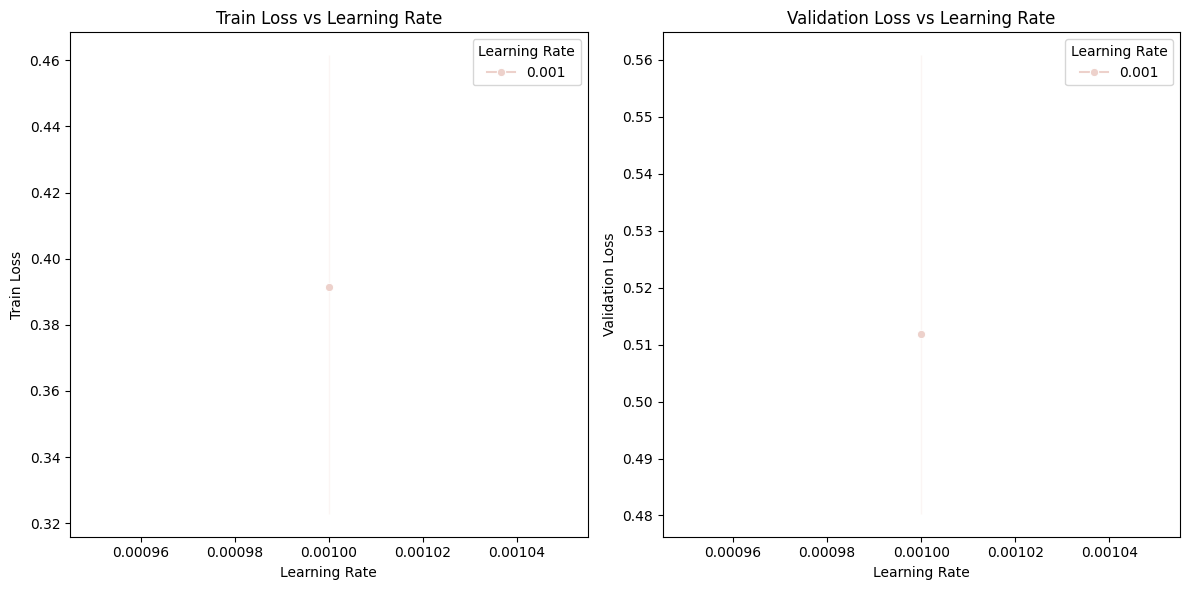

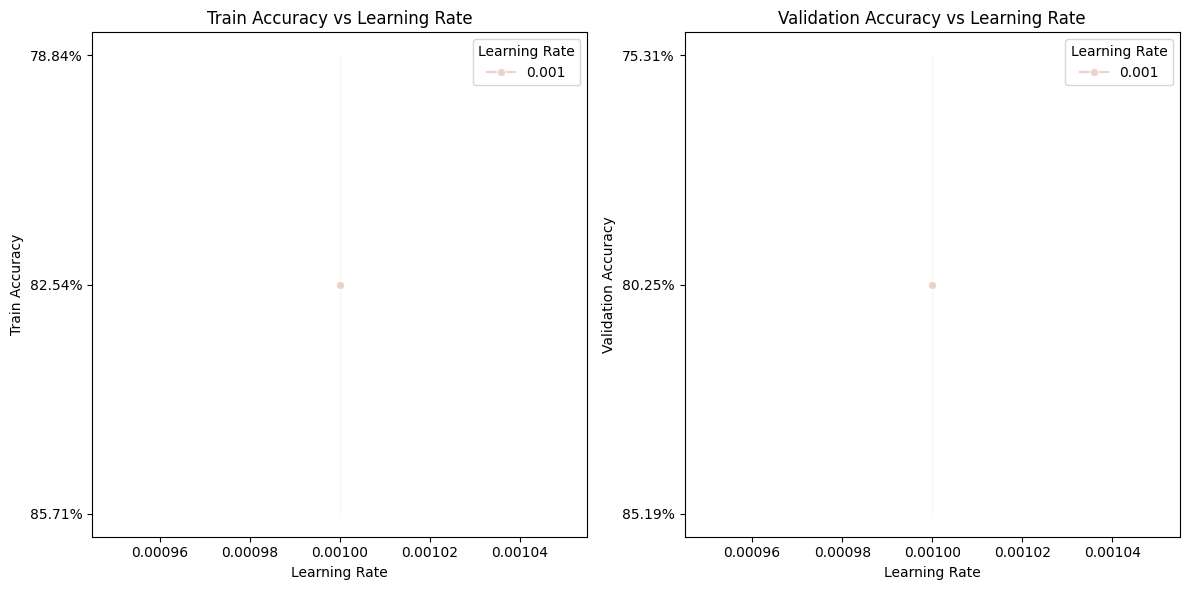

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Draw plots for Train and Validation Losses
plt.figure(figsize=(12, 6))

# Plot Train Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x='Learning Rate', y='Train Loss', marker='o', hue='Learning Rate')
plt.title("Train Loss vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Train Loss")

# Plot Validation Loss
plt.subplot(1, 2, 2)
sns.lineplot(data=df, x='Learning Rate', y='Validation Loss', marker='o', hue='Learning Rate')
plt.title("Validation Loss vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Validation Loss")

plt.tight_layout()
plt.show()

# Draw plots for Train and Validation Accuracy
plt.figure(figsize=(12, 6))

# Plot Train Accuracy
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x='Learning Rate', y='Train Accuracy', marker='o', hue='Learning Rate')
plt.title("Train Accuracy vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Train Accuracy")

# Plot Validation Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=df, x='Learning Rate', y='Validation Accuracy', marker='o', hue='Learning Rate')
plt.title("Validation Accuracy vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Validation Accuracy")

plt.tight_layout()
plt.show()


In [36]:
#超參數-epoch 50 100 150
epochs_list = [50, 100, 150]  # 測試不同的 epoch 值
learning_rates = [0.001]  # 仍然測試不同學習率
results = []

for epochs in epochs_list:
    for lr in learning_rates:
        print(f'\\nTraining with Learning Rate: {lr}, Epochs: {epochs}')

        # 初始化模型 & 優化器
        model = Model().cuda()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

        best_val_loss = float('inf')
        best_val_acc = -1

        for epoch in tqdm(range(epochs)):
            # Training
            model.train()
            total_loss = 0.0
            train_correct = 0
            total_train_samples = 0

            for features, labels in train_loader:
                features, labels = features.cuda(), labels.cuda()
                outputs = model(features)
                loss = criterion(outputs, labels)
                total_loss += loss.item()

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                train_predicted = outputs.argmax(-1)
                train_correct += (train_predicted == labels).sum().item()
                total_train_samples += labels.size(0)

            # Learning rate update
            lr_scheduler.step()

            avg_train_loss = total_loss / len(train_loader)
            train_accuracy = 100. * train_correct / total_train_samples

            # Validation
            model.eval()
            total_val_loss = 0.0
            val_correct = 0
            total_val_samples = 0

            with torch.no_grad():
                for features, labels in val_loader:
                    features, labels = features.cuda(), labels.cuda()
                    outputs = model(features)
                    loss = criterion(outputs, labels)
                    total_val_loss += loss.item()
                    predicted = outputs.argmax(-1)
                    val_correct += (predicted == labels).sum().item()
                    total_val_samples += labels.size(0)

            avg_val_loss = total_val_loss / len(val_loader)
            val_accuracy = 100. * val_correct / total_val_samples

            # Checkpoint
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss

            if val_accuracy > best_val_acc:
                best_val_acc = val_accuracy
                torch.save(model.state_dict(), f'model_lr_{lr}_epochs_{epochs}.pth')

            print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.2f}%, '
                  f'Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.2f}%')

        # 測試集評估
        model.eval()
        total_test_loss = 0.0
        test_correct = 0
        total_test_samples = 0

        with torch.no_grad():
            for features, labels in test_loader:
                features, labels = features.cuda(), labels.cuda()
                outputs = model(features)
                loss = criterion(outputs, labels)
                total_test_loss += loss.item()
                predicted = outputs.argmax(-1)
                test_correct += (predicted == labels).sum().item()
                total_test_samples += labels.size(0)

        avg_test_loss = total_test_loss / len(test_loader)
        test_accuracy = 100. * test_correct / total_test_samples

        # 存入結果
        results.append([lr, epochs, avg_train_loss, avg_val_loss, avg_test_loss, train_accuracy, val_accuracy, test_accuracy])

# 轉成 DataFrame，輸出表格
columns = ["Learning Rate", "Epochs", "Train Loss", "Validation Loss", "Test Loss", "Train Accuracy", "Validation Accuracy", "Test Accuracy"]
df = pd.DataFrame(results, columns=columns)

# 調整 Accuracy 格式為 xx.xx%
df["Train Accuracy"] = df["Train Accuracy"].map(lambda x: f"{x:.2f}%")
df["Validation Accuracy"] = df["Validation Accuracy"].map(lambda x: f"{x:.2f}%")
df["Test Accuracy"] = df["Test Accuracy"].map(lambda x: f"{x:.2f}%")

print(df)


\nTraining with Learning Rate: 0.001, Epochs: 50


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Train loss: 4.7204, Train acc: 48.15%, Val loss: 1.4700, Val acc: 61.73%
Epoch 2/50, Train loss: 1.4057, Train acc: 48.15%, Val loss: 0.6397, Val acc: 64.20%
Epoch 3/50, Train loss: 1.1905, Train acc: 53.97%, Val loss: 0.6798, Val acc: 62.96%
Epoch 4/50, Train loss: 1.1067, Train acc: 58.20%, Val loss: 0.6896, Val acc: 65.43%
Epoch 5/50, Train loss: 0.8639, Train acc: 64.02%, Val loss: 0.8119, Val acc: 64.20%
Epoch 6/50, Train loss: 0.9532, Train acc: 61.38%, Val loss: 1.0577, Val acc: 66.67%
Epoch 7/50, Train loss: 0.8476, Train acc: 65.08%, Val loss: 0.6745, Val acc: 66.67%
Epoch 8/50, Train loss: 0.6531, Train acc: 70.90%, Val loss: 0.7955, Val acc: 65.43%
Epoch 9/50, Train loss: 0.7325, Train acc: 62.43%, Val loss: 0.6860, Val acc: 66.67%
Epoch 10/50, Train loss: 0.5594, Train acc: 73.02%, Val loss: 0.6104, Val acc: 66.67%
Epoch 11/50, Train loss: 0.6774, Train acc: 64.02%, Val loss: 0.5905, Val acc: 65.43%
Epoch 12/50, Train loss: 0.5734, Train acc: 70.90%, Val loss: 0

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 4.8313, Train acc: 51.32%, Val loss: 1.5843, Val acc: 61.73%
Epoch 2/100, Train loss: 1.4118, Train acc: 60.32%, Val loss: 1.1906, Val acc: 66.67%
Epoch 3/100, Train loss: 1.0918, Train acc: 61.38%, Val loss: 0.6903, Val acc: 62.96%
Epoch 4/100, Train loss: 1.1551, Train acc: 59.26%, Val loss: 1.2723, Val acc: 55.56%
Epoch 5/100, Train loss: 1.1921, Train acc: 51.85%, Val loss: 2.3675, Val acc: 41.98%
Epoch 6/100, Train loss: 1.3224, Train acc: 58.20%, Val loss: 0.8593, Val acc: 64.20%
Epoch 7/100, Train loss: 0.8551, Train acc: 62.96%, Val loss: 0.8810, Val acc: 64.20%
Epoch 8/100, Train loss: 0.9131, Train acc: 63.49%, Val loss: 0.6967, Val acc: 69.14%
Epoch 9/100, Train loss: 0.6285, Train acc: 69.84%, Val loss: 0.9112, Val acc: 64.20%
Epoch 10/100, Train loss: 0.6240, Train acc: 73.02%, Val loss: 0.6609, Val acc: 66.67%
Epoch 11/100, Train loss: 0.6460, Train acc: 65.61%, Val loss: 0.6689, Val acc: 66.67%
Epoch 12/100, Train loss: 0.6655, Train acc: 64.55%,

  0%|          | 0/150 [00:00<?, ?it/s]

Epoch 1/150, Train loss: 6.5100, Train acc: 52.91%, Val loss: 6.2755, Val acc: 38.27%
Epoch 2/150, Train loss: 3.7475, Train acc: 52.38%, Val loss: 1.3198, Val acc: 61.73%
Epoch 3/150, Train loss: 1.6916, Train acc: 55.56%, Val loss: 1.5958, Val acc: 67.90%
Epoch 4/150, Train loss: 1.5032, Train acc: 56.61%, Val loss: 0.8933, Val acc: 65.43%
Epoch 5/150, Train loss: 0.9671, Train acc: 65.08%, Val loss: 1.5871, Val acc: 58.02%
Epoch 6/150, Train loss: 1.2841, Train acc: 59.26%, Val loss: 0.7882, Val acc: 67.90%
Epoch 7/150, Train loss: 0.7755, Train acc: 68.25%, Val loss: 0.7207, Val acc: 67.90%
Epoch 8/150, Train loss: 0.6213, Train acc: 74.60%, Val loss: 0.6980, Val acc: 65.43%
Epoch 9/150, Train loss: 0.6474, Train acc: 66.67%, Val loss: 0.7121, Val acc: 64.20%
Epoch 10/150, Train loss: 0.6675, Train acc: 61.90%, Val loss: 0.7876, Val acc: 65.43%
Epoch 11/150, Train loss: 0.7829, Train acc: 62.96%, Val loss: 0.8453, Val acc: 65.43%
Epoch 12/150, Train loss: 0.7185, Train acc: 66.14%,

ValueError: x and y must have same first dimension, but have shapes (450,) and (100,)

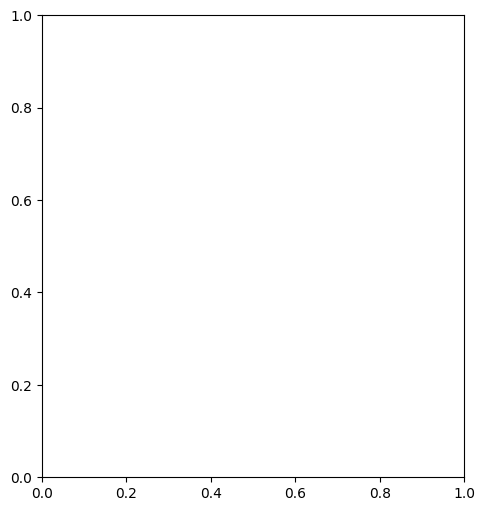

In [38]:
# 畫出損失和準確度曲線
plt.figure(figsize=(12, 6))

# 損失曲線
plt.subplot(1, 2, 1)
plt.plot(range(epochs * len(epochs_list)), train_losses, label='Train Loss')
plt.plot(range(epochs * len(epochs_list)), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

# 準確度曲線
plt.subplot(1, 2, 2)
plt.plot(range(epochs * len(epochs_list)), train_accuracies, label='Train Accuracy')
plt.plot(range(epochs * len(epochs_list)), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### Visualizing the model performance

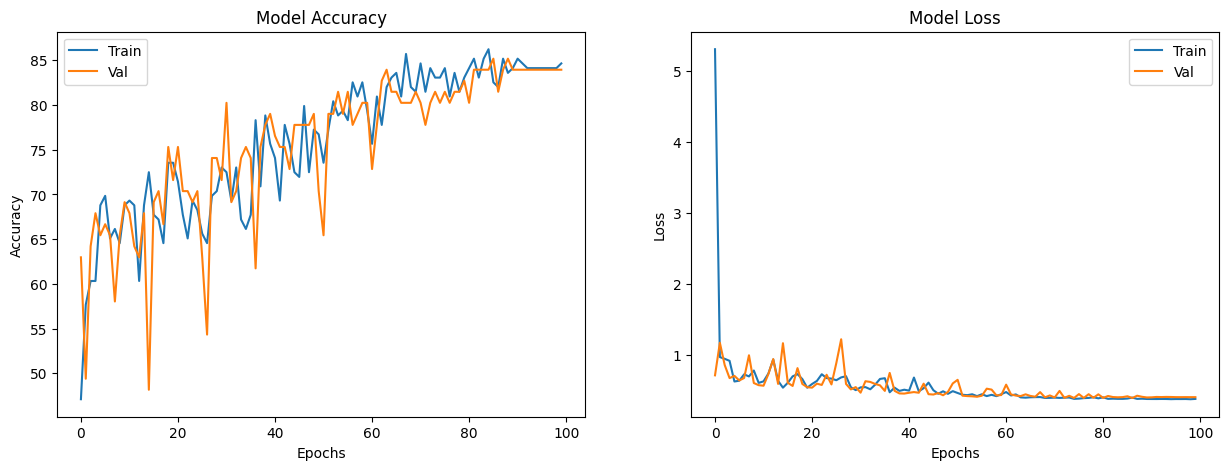

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

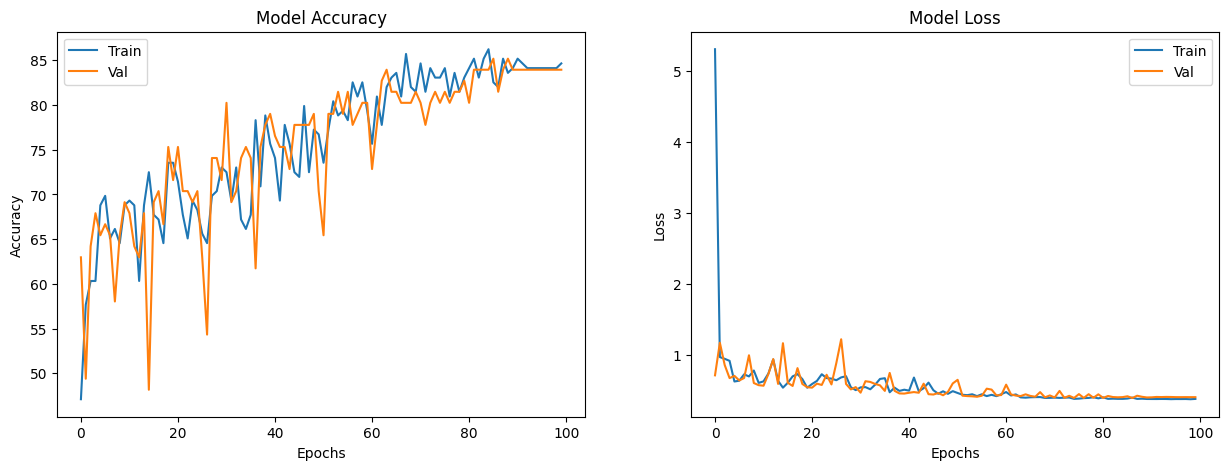

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

## D. Evaluating Your Trained Model

In [21]:
# read test file
test_data = pd.read_csv('/content/drive/MyDrive/深度學習/heart_dataset_test.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
1,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
2,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
3,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [22]:
test_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [23]:
test_data = test_data.values
test_data.shape

(31, 14)

In [24]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :13]).float()
y_test = torch.from_numpy(test_data[:, 13]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [27]:
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for features, labels in test_loader:

        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        predicted = outputs.argmax(-1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

Test accuracy is 74.19354838709677%
